In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Machine Learning
## Basic Operation CV2

In [2]:
# Import some libraries
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import cv2

%matplotlib inline

In [3]:
# Some basic parameters
inpDir = './'
outDir = './'
dataDir = 'basic_operations'

RANDOM_STATE = 24

np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

CMAP = 'jet'

LINE_THICK = 1

MARK_COLOR = (15, 82, 186)

plt.rcParams.update(params)

### Images Sizes

|Image Resolution|Width|Height|
|:--|:-:|:-:|
|VGA|640|480|
|HD|1280|720|
|FDH|1920|1080|
|4K|3840|2160|

<img src='../../images/cv_nb_img1.png' width='800' alt="Cognitive Systems"/>

## Read an Image

- cv2.IMREAD_COLOR: It specifies to load a color image. Any transparency of image will be neglected. It is the default flag. Alternatively, we can pass integer value 1 for this flag.
- cv2.IMREAD_GRAYSCALE: It specifies to load an image in grayscale mode. Alternatively, we can pass integer value 0 for this flag.
- cv2.IMREAD_UNCHANGED: It specifies to load an image as such including alpha channel. Alternatively, we can pass integer value -1 for this flag.

## Load an Image

#cv2.imread?
while True:
    cv2.imshow('Shapes', im)
    key = cv2.waitKey(1)
    if key== ord('q'):
        break
cv2.destroyAllWindows()

imgPath ='/home/pks/01_projects/CDAC/input/basic_operations/shapes.jpg'
im = cv2.imread(imgPath, cv2.IMREAD_COLOR)
plt.imshow(im) # Plot the Image

im.shape

imgPath1 ='/home/pks/01_projects/CDAC/input/basic_operations/pramod_0.png'
im1 = cv2.imread(imgPath1, cv2.IMREAD_UNCHANGED)
plt.imshow(im1) # Plot the Image
im1.shape

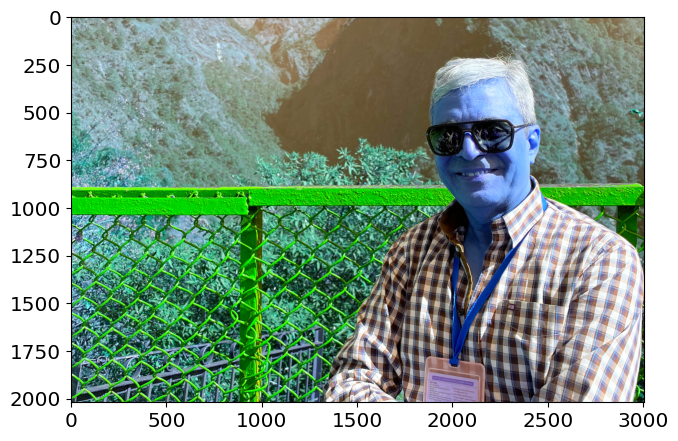

In [4]:
imgPath ='bright_image_cropped.JPG'
im = cv2.imread(imgPath, cv2.IMREAD_COLOR)
plt.imshow(im) # Plot the Image

In [5]:
im.shape

(2020, 3004, 3)

## Helper function

In [6]:
def fn_read_image(fileName):
    '''
    Args:
        fileName : Path of image file to read
    returns:
        im: image in cv2 format
        rgbIm: image in RGB format
    
    '''
    imgPath = os.path.join(inpDir, dataDir, fileName)
    
    print(imgPath)
    
    # Read image file
    im = cv2.imread(imgPath, cv2.IMREAD_COLOR)
    
    
    if im is None:
        print('Could not open or find the image:', fileName)
        exit(0)
    else:
        # convert to RGB image
        rgbIm = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
        return im, rgbIm
    
    

def fn_plot_one_img(im):
    
    '''
    Args:
        im : image to display and save
    
    '''
    # showing image
    plt.imshow(im) # Plot the Image
    
    plt.axis('off') # no axis to display
    
    #plt.savefig(os.path.join(outDir, imgFileName)) # save image to a dest.
        
def fn_plot_images(im_lst):
    '''
    Args:
        img_list: list of images
    '''
    nRows = 1
    nCols = len(im_lst)
    
    
    fig, axes = plt.subplots(nRows, nCols) # Instantiate thee fig and  axis
    
    for i in range(nCols):
        
        # display image
        axes[i].imshow(im_lst[i]['img'], cmap = im_lst[i]['cmap'])
        
        # Setting title of individual plot
        axes[i].set_title(im_lst[i]['name'])

        # Remove axis ticks from the plot
        axes[i].set_xticklabels([]);
        axes[i].set_yticklabels([]);

    # optimize the plot layout            
    plt.tight_layout()

In [7]:
imgFileName = './shapes.jpg' #'test.jpeg' # #'person_0.jpg'
srcImg, rgbImg = fn_read_image('./shapes.jpg')

./basic_operations\./shapes.jpg
Could not open or find the image: ./shapes.jpg


TypeError: cannot unpack non-iterable NoneType object

: 

In [ ]:
srcImg.shape

In [ ]:
# Convert to HSV Image
hsvImg = cv2.cvtColor(srcImg, cv2.COLOR_BGR2HSV)

img_lst = [{'img': srcImg, 'name': 'CV2 Image', 'cmap' : CMAP},
           {'img': rgbImg, 'name': 'RGB Image', 'cmap' : CMAP},
           {'img': hsvImg, 'name': 'HSV Image','cmap' : CMAP}]

fn_plot_images(img_lst)

## Colors

In [ ]:
conver_method = [i for i in dir(cv2) if i.startswith('COLOR_')]
print (conver_method)

### Stacked Images

In [ ]:
# Simple numpy operations is good enough to stack them
stackedImg = np.hstack((srcImg, rgbImg, hsvImg))

fig = plt.figure()

plt.imshow(stackedImg)

plt.title('Stacked Image');

In [ ]:
grayImg =  cv2.cvtColor(srcImg, cv2.COLOR_BGR2GRAY)

(thresh, bwImg) = cv2.threshold(grayImg, 128, 255, 
                                cv2.THRESH_BINARY | cv2.THRESH_OTSU)

img_lst = [{'img': rgbImg, 'name': 'RGB Image RGB', 'cmap' : CMAP},
           {'img': grayImg, 'name': 'Gray Image','cmap' : 'gray'},
           {'img': bwImg, 'name': 'B/W Image', 'cmap' :'gray'}]

fn_plot_images(img_lst)

In [ ]:
redImg = rgbImg .copy()
redImg[:,:, 1] = 0
redImg[:,:, 2] = 0
print ('Shape of Red Image', redImg.shape)


greenImg = rgbImg .copy()
greenImg[:,:, 0] = 0
greenImg[:,:, 2] = 0
print ('Shape of Green Image', greenImg.shape)



blueImg = rgbImg .copy()
blueImg[:,:, 0] = 0
blueImg[:,:, 1] = 0
print ('Shape of Blue Image', blueImg.shape)

In [ ]:
redChannel = rgbImg .copy()
redChannel = redChannel[:,:, 0]
print ('Shape of Red Channel', redChannel.shape)

greenChannel = rgbImg .copy()
greenChannel = greenChannel[:,:, 1]
print ('Shape of Green Channel', greenChannel.shape)

blueChannel = rgbImg .copy()
blueChannel = blueChannel[:,:, 2]
print ('Shape of Blue Channel', blueChannel.shape)

img_lst = [{'img': rgbImg, 'name': 'CV2 Image', 'cmap' : CMAP},
           {'img': redChannel, 'name': 'redChannel', 'cmap' : 'gray'},
           {'img': greenChannel, 'name': 'greenChannel','cmap' : 'gray'},
           {'img': blueChannel, 'name': 'blueChannel', 'cmap' :'gray'}]

fn_plot_images(img_lst)

## Gaussian Blur
This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element. This is done by the function cv.blur() or cv.boxFilter(). We should specify the width and height of the kernel. A 3x3 normalized box filter would look like the below:

$$\text{K = }\frac{1}{9}*\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$$

> cv2.GaussianBlur(srcImg, ksize, sigmaX, sigmaY, borderType)
- srcImg: Source/Input of n-dimensional array.
- ksize: Kernal is matrix of an (no. of rows)*(no. of columns) order .Its Size is given in the form of tuple (no. of rows, no. of columns). no. of rows and no. of columns should be odd .If ksize is given as (0 0), then ksize is computed from given sigma values i.e. sigmaX and sigmaY.
- sigmaX: Standard deviation value of kernal along horizontal direction.
- sigmaY: Standard deviation value of kernal along vertical direction.
- borderType: This specify boundaries of an image while kernel is applied on borders of an image.
- Possible values of borderType are :


    - cv2.BORDER_CONSTANT
    - cv2.BORDER_REPLICATE
    - cv2.BORDER_REFLECT
    - cv2.BORDER_WRAP
    - cv2.BORDER_REFLECT_101
    - cv2.BORDER_TRANSPARENT
    - cv2.BORDER_REFLECT101
    - cv2.BORDER_DEFAULT
    - cv2.BORDER_ISOLATED


In [ ]:
blurImg = cv2.GaussianBlur(grayImg, (21,21), 0)

img_lst = [{'img': rgbImg, 'name': 'CV2 Image', 'cmap' : CMAP},
           {'img': grayImg, 'name': 'Gray Image','cmap' : 'gray'},
           {'img': blurImg, 'name': 'blurImg','cmap' : 'gray'}]

fn_plot_images(img_lst)

## Canny Edge Detection
You can use Canny() edge detection algorithm detect edges in an image. A Canny edge detector is a multi-step algorithm to detect the edges for any input image. It involves the below-mentioned steps to be followed while detecting edges of an image.

1. Removal of noise in input image using a Gaussian filter.

2. Computing the derivative of Gaussian filter to calculate the gradient of image pixels to obtain magnitude along x and y dimension.

3. Considering a group of neighbors for any curve in a direction perpendicular to the given edge, suppress the non-max edge contributor pixel points.

4. Lastly, use the Hysteresis Thresholding method to preserve the pixels higher than the gradient magnitude and neglect the ones lower than the low threshold value.



> cv2.Canny(image, threshold1, threshold2, apertureSize, L2gradient)

- image: Source/Input image of n-dimensional array.
- threshold1: It is the High threshold value of intensity gradient.
- threshold2: It is the Low threshold value of intensity gradient.
Optional parameters are:

- apertureSize: Order of Kernel(matrix) for the Sobel filter. Its default value is (3 x 3), and its value should be odd between 3 and 7. It is used for finding image gradients. Filter is used for smoothening and sharpening of an image.
- L2gradient: This specifies the equation for finding gradient magnitude. L2gradient is of boolean type, and its default value is False.


In [ ]:
cannyImg = cv2.Canny(srcImg, 150, 150)

img_lst = [{'img': srcImg, 'name': 'CV2 Image', 'cmap' : CMAP},
           {'img': grayImg, 'name': 'Gray Image','cmap' : 'gray'},
           {'img': cannyImg, 'name': 'cannyImg','cmap' : 'gray'}]

fn_plot_images(img_lst)

## Dilation and Erosion
Erosion and Dilation are morphological image processing operations which is a procedure for modifying the geometric structure in the image. In morphism, we find the shape and size or structure of an object. Both operations are defined for binary images, but we can also use them on a grayscale image as well. These are widely used in the following way:

- Removing Noise
- Identify intensity bumps or holes in the picture.
- Isolation of individual elements and joining disparate elements in image.

### Dilation
Dilation is a technique where we expand the image. It adds the number of pixels to the boundaries of objects in an image. The structuring element controls it. The structuring element is a matrix of 1's and 0's.

### Erosion
Erosion is much similar to dilation. The difference is that the pixel value calculated minimum rather than the maximum in dilation. The image is replaced under the anchor point with that calculated minimum pixel. Unlikely dilation, the regions of darker shades increase. While it decreases in white shade or brighter side.

In [ ]:
krnl = np.ones((5,5)) / 25.

# bright area of the image dilates around the black regions of the background.
dilationImg = cv2.dilate(cannyImg, krnl, iterations = 1) # Change iteration to increase dialation

# inverse of dialation
erodedImg = cv2.erode(dilationImg, krnl, iterations = 1)

img_lst = [{'img': grayImg, 'name': 'Gray Image','cmap' : 'gray'},
           {'img': cannyImg, 'name': 'cannyImg','cmap' : 'gray'},
           {'img': dilationImg, 'name': 'dilationImg','cmap' : 'gray'},
          {'img': erodedImg, 'name': 'erodedImg','cmap' : 'gray'},
           ]

fn_plot_images(img_lst)

## Resizing and Cropping

In [ ]:
width = rgbImg.shape[1]
height = rgbImg.shape[0]
print (width, height)

In [ ]:
resizeImg = cv2.resize(rgbImg, (width//2,height//2 ))
cropImg = rgbImg[0:height//3, width//4:3*width//4]

img_lst = [{'img': rgbImg, 'name': 'RGB Image','cmap' : CMAP},
           {'img': resizeImg, 'name': f'resizeImg ({width//2} x {height//2})','cmap' : CMAP},
           {'img': cropImg, 'name': 'cropImg','cmap' : CMAP}]

fn_plot_images(img_lst)

## Text and Lines

In [ ]:
blnkImg = np.zeros((512, 960,3), np.int8)

cv2.line(blnkImg, (0,0), (blnkImg.shape[1], blnkImg.shape[0]),
         (0,255,0), 2)

cv2.rectangle(blnkImg, (0,0), (250,350), MARK_COLOR, 5)

cv2.circle(blnkImg, (400,50), 30, (255,255,0), 2)

cv2.putText(blnkImg, 'CDAC', (300,200), 
            cv2.FONT_HERSHEY_COMPLEX,1, (0,150,0), 3)

plt.imshow(blnkImg);

In [ ]:
height, width = srcImg.shape[:2] 
quarter_height, quarter_width = height/4, width/4

T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) 
transImg = cv2.warpAffine(rgbImg, T, (width, height)) 

img_lst = [{'img': rgbImg, 'name': 'RGB Image','cmap' : CMAP},
           {'img': transImg, 'name': 'transImg','cmap' : CMAP}]

fn_plot_images(img_lst)

### Affine Transform

This transform is obtained from the relation between three points.

In [ ]:
srcImg.shape[0]

In [ ]:
# create Source triangle with 'top-right', 'top-left', 'bottom-left'
srcTri = np.array( [[0, 0], [srcImg.shape[1] - 1, 0], 
                    [0, srcImg.shape[0] - 1]] ).astype(np.float32)

# Create destinations triangle
tl = [0, int(srcImg.shape[1]*0.33)]
tr = [int(srcImg.shape[1]*0.85), int(srcImg.shape[0]*0.15)]
bl = [int(srcImg.shape[1]*0.15), int(srcImg.shape[0]*0.7)]

# convert to array
dstTri = np.array( [tl, tr, bl ] ).astype(np.float32)

# mark points on the image for display
markedupImg = rgbImg.copy()

cv2.circle(markedupImg, (tl), 5, MARK_COLOR, LINE_THICK)
cv2.putText(markedupImg, 'Top Left', (tl), cv2.FONT_HERSHEY_COMPLEX,1,
            (0,255,0), 1)

cv2.circle(markedupImg, (tr), 5, MARK_COLOR, LINE_THICK)
cv2.putText(markedupImg, 'Top Right', (tr), cv2.FONT_HERSHEY_COMPLEX,1,
            (0,255,0), 1)

cv2.circle(markedupImg, (bl), 5, MARK_COLOR, LINE_THICK)
cv2.putText(markedupImg, 'Bottom left', (bl), cv2.FONT_HERSHEY_COMPLEX,1,
            (0,255,0), 1)

# mark the triangle
isClosed = True
 
# Blue color in RGB
#color = (0, 0, 255)

poly = np.array([tl,tr,bl], np.int32)

poly = poly.reshape((-1, 1, 2))

cv2.polylines(markedupImg, [poly],
                      isClosed, MARK_COLOR, LINE_THICK)

# get warp matrix for transformation
warp_mat = cv2.getAffineTransform(srcTri, dstTri)

# warp the image
warpImg = cv2.warpAffine(rgbImg, warp_mat, 
                         (srcImg.shape[1], srcImg.shape[0]))

# mark the points
tmpImg = warpImg.copy()
cv2.circle(tmpImg, (tl), 5, (255,0,0), LINE_THICK)
cv2.circle(tmpImg, (tr), 5, (255,0,0), LINE_THICK)
cv2.circle(tmpImg, (bl), 5, (255,0,0), LINE_THICK)
cv2.polylines(tmpImg, [poly],
                      isClosed, MARK_COLOR, 5)

img_lst = [{'img': rgbImg, 'name': 'RGB Image','cmap' : CMAP},
           {'img': markedupImg, 'name': 'markedupImg','cmap' : CMAP},
           {'img': tmpImg, 'name': 'warpImg','cmap' : CMAP}]


fn_plot_images(img_lst)

In [ ]:
fn_plot_one_img(tmpImg)

### Rotation

To rotate an image, we need to know two things:

- The center with respect to which the image will rotate
- The angle to be rotated. In OpenCV a positive angle is counter-clockwise
- Optional: A scale factor

In [ ]:
center = (warpImg.shape[1]//2, warpImg.shape[0]//2)
angle = -30
scale = 0.8

# We need to create a matrix to rotate
rot_mat = cv2.getRotationMatrix2D( center, angle, scale )

rotatedImg = cv2.warpAffine(rgbImg, rot_mat, (srcImg.shape[1], 
                                              srcImg.shape[0]))

wNrImg = cv2.warpAffine(warpImg, rot_mat, (srcImg.shape[1], 
                                           srcImg.shape[0]))

img_lst = [{'img': rgbImg, 'name': 'RGB Image','cmap' : CMAP},
           {'img': warpImg, 'name': 'warpImg','cmap' : CMAP},
           {'img': rotatedImg, 'name': 'rotatedImg','cmap' : CMAP},
           {'img': wNrImg, 'name': 'Warped and Rotated','cmap' : CMAP}]

fn_plot_images(img_lst)

### Perspective Transform

In [ ]:
br = [400, 379]

# Polygon corner points coordinates in  a consistent order of the points
poly = np.array([tl, bl, br, tr], np.int32)

# To draw a polygon, first you need coordinates of vertices. Make those points
# into an array of shape ROWSx1x2 where ROWS are number of vertices 
# and it should be of type int32.
poly1 = poly.reshape((-1, 1, 2))

# is it a closed polygon
isClosed = True
 
# Blue color in BGR
color = (0, 0, 255)
 
# Line thickness of 3 px
thickness = 3

# make a copy of wraped Image
tmpImg = warpImg.copy()

# Mark draw a the polygon
cv2.polylines(tmpImg, [poly1],
                      isClosed, color, thickness)

# Mark points on the image
cv2.circle(tmpImg, (tl), 3, MARK_COLOR, LINE_THICK)
cv2.putText(tmpImg, 'Top Left', (tl), cv2.FONT_HERSHEY_COMPLEX,1, (0,255,0), 1)

cv2.circle(tmpImg, (tr), 3, MARK_COLOR, LINE_THICK)
cv2.putText(tmpImg, 'Top Right', (tr), cv2.FONT_HERSHEY_COMPLEX,1, (0,255,0), 1)

cv2.circle(tmpImg, (bl), 3, MARK_COLOR, LINE_THICK)
cv2.putText(tmpImg, 'Bottom left', (bl), cv2.FONT_HERSHEY_COMPLEX,1, (0,255,0), 1)

cv2.circle(tmpImg, (br), 3, MARK_COLOR, LINE_THICK)
cv2.putText(tmpImg, 'Bottom Right', (br), cv2.FONT_HERSHEY_COMPLEX,1, (0,255,0), 1)

# now that we have the dimensions of the new image, construct
# the set of destination points to obtain a (i.e. top-down view)
# of the image, again specifying points
# in the top-left, top-right, bottom-right, and bottom-left
# order

src = np.array([tl, tr, br, bl], dtype = 'float32')
dst = np.array([[0, 0],
                [width, 0],
                [width, height],
                [0, height]], dtype = "float32")

# Create Transformation matrix
matrix = cv2.getPerspectiveTransform(src,dst)

# Transform the image
strImg = cv2.warpPerspective(warpImg, matrix, (width, height))

# Check the difference
diffImg = rgbImg - strImg

img_lst = [{'img': rgbImg, 'name': 'RGB Image','cmap' : CMAP},
           {'img': tmpImg, 'name': 'wraped Image','cmap' : CMAP},
           {'img': strImg, 'name': 'Straightened Image','cmap' : CMAP},
           {'img': diffImg, 'name': 'difference','cmap' : CMAP},]

fn_plot_images(img_lst)

In [ ]:
def getContours(im):
    
    '''
    Args:
        im: CV2 image object (Canny Image)
    '''
    
    contours, hierarchy = cv2.findContours(im, 
                                           cv2.RETR_EXTERNAL, 
                                           cv2.CHAIN_APPROX_NONE) # good for finding outer countours
    
    for cnt in contours:
        
        area = cv2.contourArea(cnt)
        
        if area  > 50:
            
            cv2.drawContours(contoursImg, cnt, -1, (255,0,0), 1) # plot where area is significant
            
            peri = cv2.arcLength(cnt, True)
            
            #print (area, peri)
            
            # get approx corner point
            approx = cv2.approxPolyDP(cnt, 0.01*peri, True) 
            
            #print (area, '|', len(approx))
            
            objCor = len(approx)
            
            # get bounding box of the approx
            x, y, w, h = cv2.boundingRect(approx)
            
            cv2.rectangle(contoursImg, (x,y), (x+w, y+h), MARK_COLOR)
                
            cv2.putText(contoursImg, str(objCor), 
                            (x+w//2-10, y+h//2+10), # Origin
                            cv2.FONT_HERSHEY_COMPLEX, #fontFace
                            1,             #fontScale                            
                            MARK_COLOR, #color
                            1) # thickness
        
# Create copy of RGB Image     
contoursImg = rgbImg.copy()
    
getContours(cannyImg)

img_lst = [#{'img': rgbImg, 'name': 'RGB Image','cmap' : CMAP},
           {'img': cannyImg, 'name': 'Canny Image','cmap' : 'gray'},
           {'img': contoursImg, 'name': 'Contours','cmap' : CMAP}]

fn_plot_images(img_lst)

In [ ]:
imgFileName = 'bubblingFish.jpg'

srcImg, rgbImg = fn_read_image(imgFileName)

print (srcImg.shape)

In [ ]:
grayImg = cv2.cvtColor(srcImg, cv2.COLOR_BGR2GRAY) 

cannyImg = cv2.Canny(grayImg, 30, 200) 

rgbImg = cv2.cvtColor(srcImg, cv2.COLOR_BGR2RGB)

img_lst = [{'img': srcImg, 'name': 'Source Image','cmap' : CMAP},
           {'img': rgbImg, 'name': 'RBG Image','cmap' : CMAP},
           {'img': cannyImg, 'name': 'Canny Image','cmap' : 'gray'}]

fn_plot_images(img_lst)

In [ ]:
contours, hierarchy = cv2.findContours(cannyImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


print("Number of Contours: " + str(len(contours)))


In [ ]:
tmpImg = rgbImg.copy()

tmp2Img = np.ones_like(rgbImg)*255

cv2.drawContours(tmpImg, contours, -1, (0, 255, 0), 1)

if len(contours) != 0:
    c = max(contours, key = cv2.contourArea)

# Draw biggest contour in Blue
cv2.drawContours(tmp2Img, c, -1, (0, 0, 255),1)

img_lst = [{'img': rgbImg, 'name': 'RBG Image','cmap' : CMAP},
           {'img': tmpImg, 'name': 'Countours','cmap' : CMAP},
           {'img': tmp2Img, 'name': 'Largest','cmap' : CMAP}]

fn_plot_images(img_lst)

### Grab Cut

How it works from user point of view ? Initially user draws a rectangle around the foreground region (foreground region should be completely inside the rectangle). Then algorithm segments it iteratively to get the best result. Done. But in some cases, the segmentation won't be fine, like, it may have marked some foreground region as background and vice versa. In that case, user need to do fine touch-ups. Just give some strokes on the images where some faulty results are there. Strokes basically says *"Hey, this region should be foreground, you marked it background, correct it in next iteration"* or its opposite for background. Then in the next iteration, you get better results.

In [ ]:
srcImg.shape

In [ ]:
imgFileName = 'Lionel_Messi_1.jpg'

srcImg, rgbImg = fn_read_image(imgFileName)

mkdImg = rgbImg.copy()

cv2.rectangle(mkdImg, (190, 4), (845,665), MARK_COLOR, 5)

img_lst = [{'img': srcImg, 'name': 'Source','cmap' : CMAP},
           {'img': rgbImg, 'name': 'RGB Image','cmap' : CMAP},
           {'img': mkdImg, 'name': 'Marked Image','cmap' : CMAP},
          ]
fn_plot_images(img_lst)

In [ ]:
fn_plot_one_img(mkdImg)

In [ ]:
mask = np.zeros(rgbImg.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (190, 4, 845,665)

cv2.grabCut(rgbImg,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
cutImg = rgbImg*mask2[:,:,np.newaxis]

img_lst = [{'img': rgbImg, 'name': 'RGB','cmap' : CMAP},
           {'img': cutImg, 'name': 'Cut Image','cmap' : CMAP}]
fn_plot_images(img_lst)

In [ ]:
newmask = cv2.imread(os.path.join(inpDir, dataDir, 'Lionel_Messi_mask.jpg'),0)

mask[newmask == 0] = 0
mask[newmask == 255] = 1

mask, bgdModel, fgdModel = cv2.grabCut(rgbImg, mask, None, bgdModel,
                                       fgdModel,5,cv2.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')

cutImg = rgbImg*mask[:,:,np.newaxis]

img_lst = [{'img': rgbImg, 'name': 'RGB','cmap' : CMAP},
           {'img': cutImg, 'name': 'Cut Image','cmap' : CMAP}]

fn_plot_images(img_lst)

In [ ]:
fn_plot_one_img(cutImg)